# Maximizing Revenue for Taxi Cab Drivers through Payment Type analysis

### Problem Statement

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

### Objective
 

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

### Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

### import libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
import os

### Load dataset

In [2]:
pwd

'C:\\Users\\LENOVO'

In [3]:
df= pd.read_csv(r"C:\Users\LENOVO\Downloads\yellow_tripdata_2020-01 (1).csv")

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [5]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0
6405007,NaN,2020-01-31 22:44:00,2020-01-31 23:06:00,NaN,11.60,NaN,NaN,179,205,NaN,54.56,2.75,0.5,0.0,0.00,0.3,58.11,0.0


### EDA

In [6]:
df.shape

(6405008, 18)

In [7]:
df.size

115290144

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


In [92]:
#change the datatype of column tpep_pickup_datetime & tpep_dropoff_datetime into datetime

df['tpep_pickup_datetime'] =pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])


In [93]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [94]:
# create new column 'Duration' , from tpep_dropoff_datetime - tpep_pickup_datetime 
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000
5,2.0,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,N,7,193,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0,0.883333
6,2.0,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.00,1.0,N,193,193,1.0,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0.0,0.066667
7,2.0,2019-12-18 15:27:49,2019-12-18 15:28:59,1.0,0.00,5.0,N,193,193,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5,1.166667
8,2.0,2019-12-18 15:30:35,2019-12-18 15:31:35,4.0,0.00,1.0,N,193,193,1.0,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5,1.000000
9,1.0,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.70,1.0,N,246,48,1.0,8.00,3.0,0.5,2.35,0.0,0.3,14.15,2.5,11.450000


In [95]:
# filltered dataset

df=df[["passenger_count","payment_type","fare_amount","trip_distance","duration"]]

In [96]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  float64
 1   payment_type     float64
 2   fare_amount      float64
 3   trip_distance    float64
 4   duration         float64
dtypes: float64(5)
memory usage: 244.3 MB


In [98]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [99]:
(65441/len(df))*100    # only 1% data is missing ,so we can drop that

1.021716132126611

In [100]:
df.dropna(inplace =True)

In [101]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [102]:
#change the datatype of passenger_count & payment_type into int
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')

In [103]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1,1,11.0,2.10,14.233333
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333
6339565,1,2,8.5,1.61,9.633333


In [104]:
# duplicate

df.duplicated().sum()

3331706

In [105]:
#drop the duplicate values
df.drop_duplicates(inplace =True)

In [106]:
df.shape

(3007861, 5)

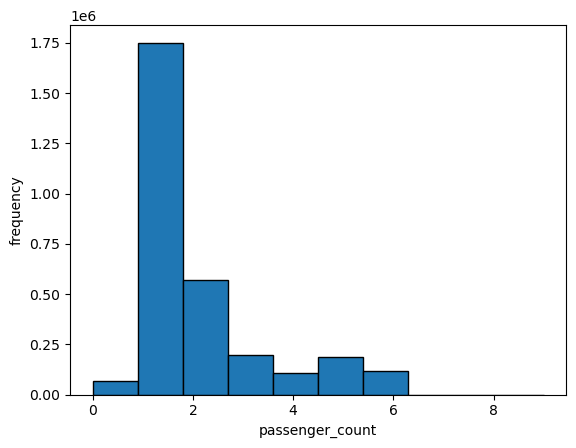

In [107]:
plt.hist(df['passenger_count'],bins=10,edgecolor='black',density=False)
plt.xlabel("passenger_count")
plt.ylabel("frequency")
plt.show()

In [108]:
df['passenger_count'].value_counts(normalize =True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

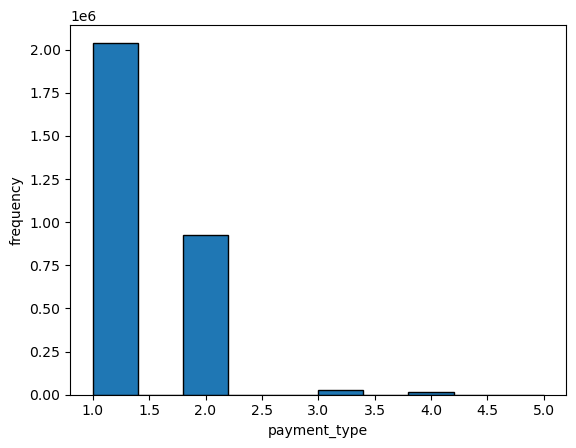

In [109]:
plt.hist(df['payment_type'],bins=10,edgecolor='black')
plt.xlabel('payment_type')
plt.ylabel('frequency')
plt.show()

In [110]:
df['payment_type'].value_counts(normalize=True)


payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [111]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0) & (df['passenger_count']<6)]

In [112]:
df.shape

(2780283, 5)

In [113]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace = True)


In [114]:
df.head(10)

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.00,1.20,4.800000
1,1,Card,7.00,1.20,7.416667
2,1,Card,6.00,0.60,6.183333
3,1,Card,5.50,0.80,4.850000
4,1,Cash,3.50,0.00,2.300000
5,1,Cash,2.50,0.03,0.883333
6,1,Card,2.50,0.00,0.066667
7,1,Card,0.01,0.00,1.166667
8,4,Card,2.50,0.00,1.000000
9,2,Card,8.00,0.70,11.450000


In [115]:
# statistical summary

df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [116]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

### finding outliers and treating it

<Axes: xlabel='fare_amount'>

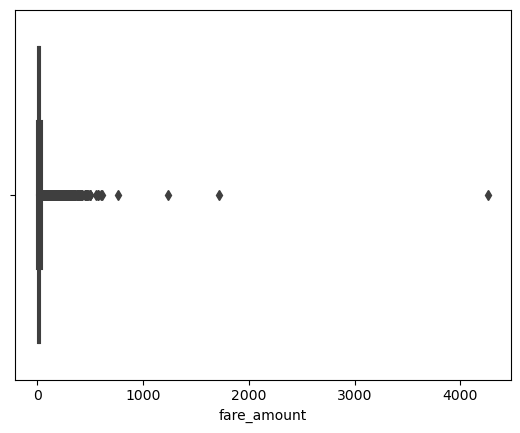

In [117]:
sns.boxplot(x=df['fare_amount'])

<Axes: xlabel='trip_distance'>

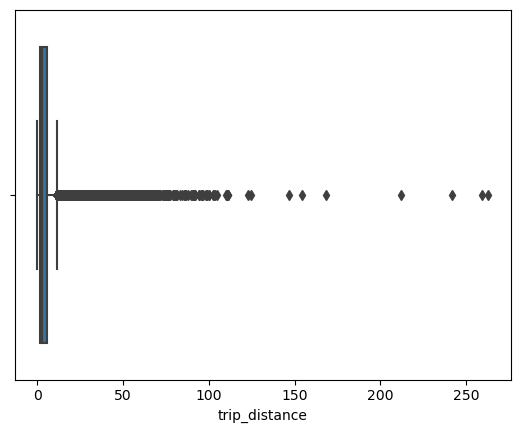

In [118]:
sns.boxplot(x=df['trip_distance'])

<Axes: xlabel='duration'>

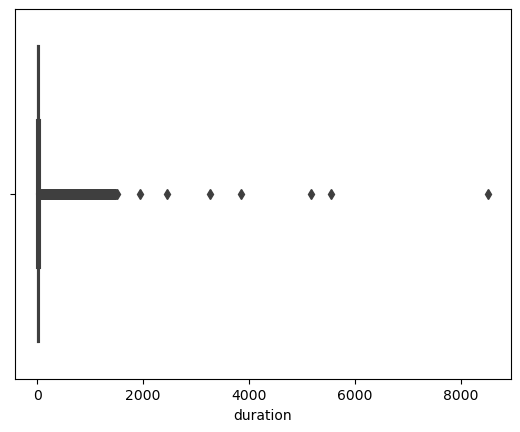

In [119]:
sns.boxplot(x=df['duration'])

In [120]:

for col in ['fare_amount','trip_distance','duration']:
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    IQR = q3-q1
    
    lower_limit =q1-(1.5*IQR)
    upper_limit =q3+(1.5*IQR)
    
    df=df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]

In [121]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


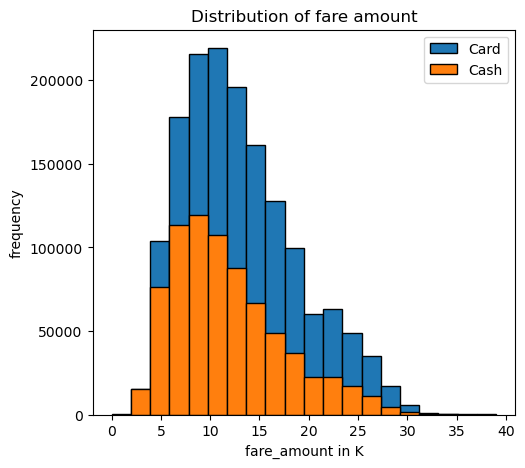

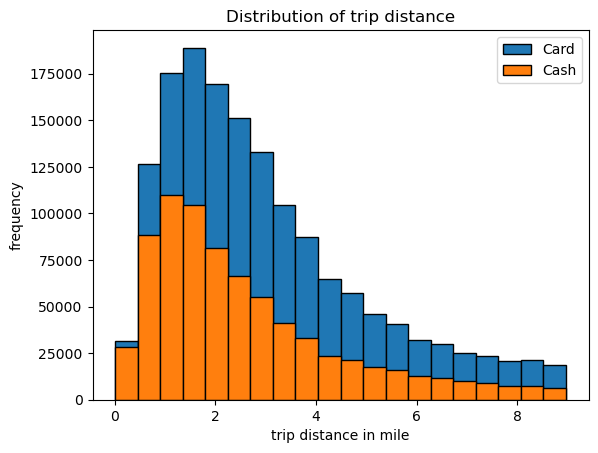

In [137]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype ='barstacked',bins=20,edgecolor='black',label ='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype ='barstacked',bins=20,edgecolor='black',label ='Cash')
plt.xlabel('fare_amount in K')
plt.ylabel('frequency')
plt.legend()
plt.show()


plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype ='barstacked',bins=20,edgecolor='black',label ='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype ='barstacked',bins=20,edgecolor='black',label ='Cash')
plt.xlabel('trip distance in mile')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [123]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

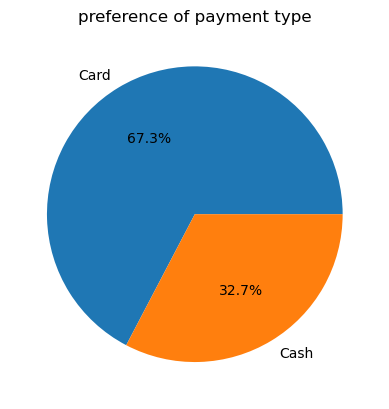

In [124]:
plt.title('preference of payment type')
plt.pie(df['payment_type'].value_counts(normalize =True),labels=df['payment_type'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [125]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count': 'count'}, inplace=True)
passenger_count.reset_index(inplace =True)

In [126]:
passenger_count['percent']=(passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,percent
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [127]:
new_df=pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
new_df['payment_type'] = ['Card','Cash']
new_df.iloc[0,1:] =passenger_count.iloc[0:5,-1]
new_df.iloc[1,1:] =passenger_count.iloc[5:,-1]
new_df

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


<Axes: ylabel='payment_type'>

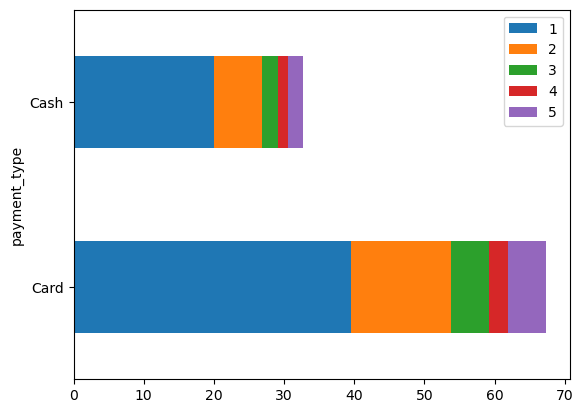

In [128]:
new_df.plot(x='payment_type',kind='barh',stacked =True)


Null hypothisis  :  There is no difference in average fare amount between customers who use credit cards and customers who use cash.

Alternative hypothisis  :  There is a difference in a averege fare amount between  customers who use credit cards and customers who use cash.

### T test

In [138]:
6/';,/'.#we don't know the SD and mean of the population and the data is not normaly distributed

card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample = df[df['payment_type']=='Cash']['fare_amount']
card_sample

0           6.0
1           7.0
2           6.0
3           5.5
9           8.0
           ... 
6339550    10.5
6339555    10.0
6339561    17.5
6339563    13.0
6339564    12.5
Name: fare_amount, Length: 1547039, dtype: float64

In [132]:
t_stats,p_value=st.ttest_ind(a=card_sample ,b=cash_sample,equal_var=True)
print('t_stats :-',t_stats)
print('p_value :-',p_value)

t_stats :- 166.81250013045764
p_value :- 0.0


In [133]:
significant_level=0.05
if p_value<significant_level:
    print('reject Null hypothesis ,  There is a difference in a averege fare amount between customers who use credit cards and customers who use cash.')
else:
    print('accept NUll hypothesis , There is no difference in average fare amount between customers who use credit cards and customers who use cash.')

reject Null hypothesis ,  There is a difference in a averege fare amount between customers who use credit cards and customers who use cash.
